### `Project - AllLife Credit Card Customer Segmentation`

### `Background`

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


### `Objective`
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.


### `Key Questions`

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?


### `Data Description`

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [6]:
!pip install yellowbrick

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Import the dataset

In [8]:
data=pd.read_csv('Credit Card Customer Data.csv')
df_CC=data.copy()

# Checking the initial observations

In [9]:
df_CC.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Getting basic details about dataset

In [10]:
df_CC.shape

(660, 7)

In [11]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [12]:
df_CC.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Points to be Noted:

- The dataset has 660 rows and 7 columns.
- All of the data-types are int64.
- There are no null values in this dataset.


# Summary of the variables

In [13]:
df_CC.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


    We will check if any of these variables have outliers as we move to the visualization.
    Some customers have credit limits as high as 200,000. These might be very few customers.
    Some of the customers have 10 credit cards while the average is 5.
    The other variables, visits and calls, have a minimum value of 0. It is possible that these are new customers we just acquired or they are not active.

# Exploratory Data Analysis


### Univariate Analysis

### Variable Avg_Credit_Limit:

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


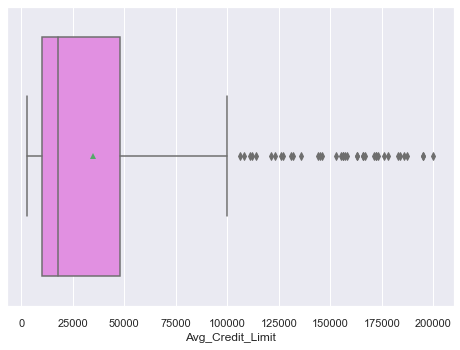

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


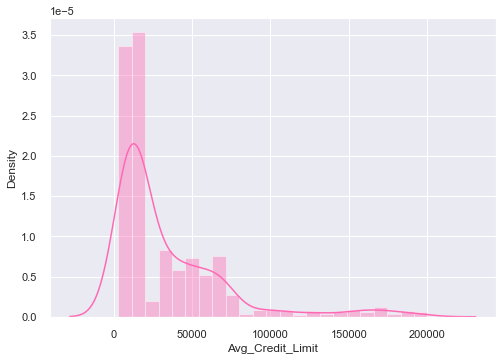

In [14]:
sns.boxplot(df_CC['Avg_Credit_Limit'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_CC['Avg_Credit_Limit'],color='hotpink')
plt.show()

- The distribution of this variables is right skewed. There are a lot of outlier values here above 100,000. We will see how we want to treat these outliers as we go forward.
- Majority of the customer credit limits are within 50,000.

### Variable Total_Credit_Cards:

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


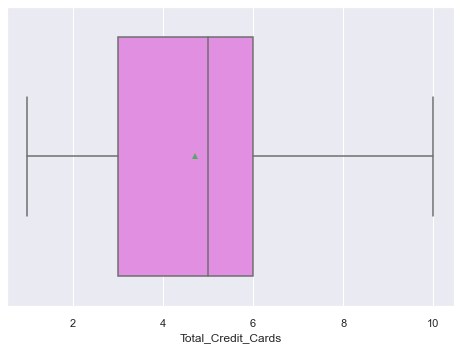

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


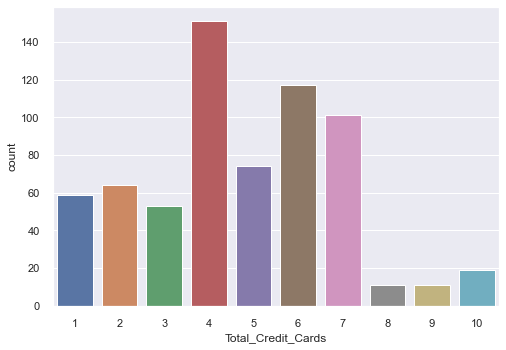

In [17]:
sns.boxplot(df_CC['Total_Credit_Cards'], showmeans=True, color='violet')
plt.show()

display(df_CC['Total_Credit_Cards'].value_counts())
sns.countplot(df_CC['Total_Credit_Cards'])
plt.show()

- There are no outliers in this variable as we look at the box plot.
- The distribution looks exactly like as I expected. The average number of cards customers have is 5. It is almost a normal distribution but looks very slightly skewed to right.

### Variable Total_visits_bank:

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


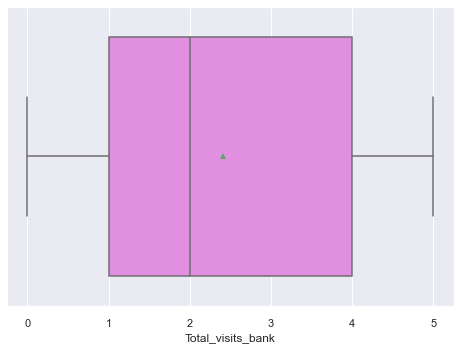

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


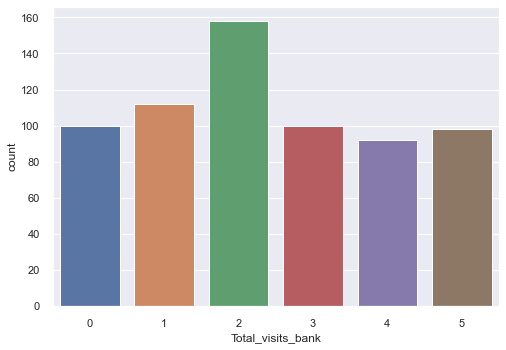

In [18]:
sns.boxplot(df_CC['Total_visits_bank'], showmeans=True, color='violet')
plt.show()

display(df_CC['Total_visits_bank'].value_counts())
sns.countplot(df_CC['Total_visits_bank'])
plt.show()

- There are no outliers in this variable as well. 
- Lot of customers seems to have visited the bank at twice. But we do see good chunk(100) of customers who haven't visited ever. May be they are new or they just prefer online banking.

### Variable Total_visits_online:

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


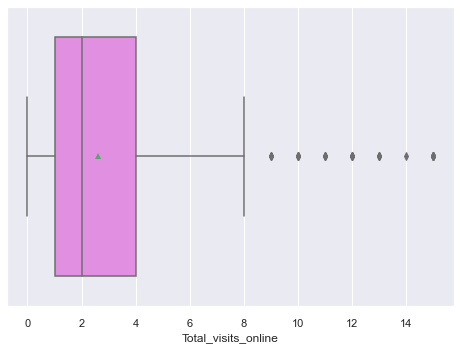

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


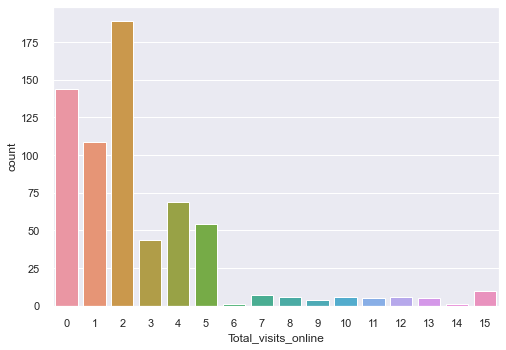

In [19]:
sns.boxplot(df_CC['Total_visits_online'], showmeans=True, color='violet')
plt.show()

display(df_CC['Total_visits_online'].value_counts())
sns.countplot(df_CC['Total_visits_online'])
plt.show()

- We do see outliers in this variable. Number of visits greater than 7 seem to be the ones with very few values. We can probably exclude them further.
- As we see from the bottom plot, most of the customers visited less than 5 times with a significant chunk(144) who never visited online. May be these are the people who go the the bank physically.

### Variable Total_calls_made:

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


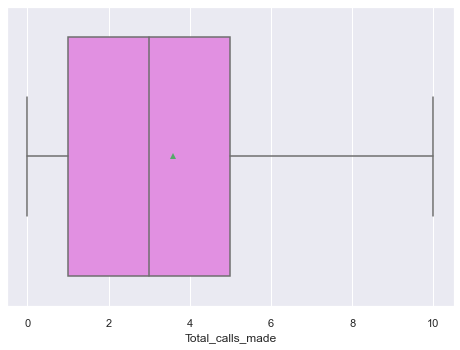

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


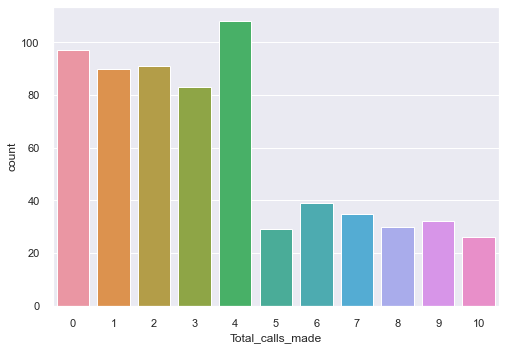

In [20]:
sns.boxplot(df_CC['Total_calls_made'], showmeans=True, color='violet')
plt.show()

display(df_CC['Total_calls_made'].value_counts())
sns.countplot(df_CC['Total_calls_made'])
plt.show()

- There are no any significant outliers in this variable. Average is around 3.
- Although most of the customers made less than 5 calls, good amount of customers do fall in >5 category.

### Bivariate Analysis

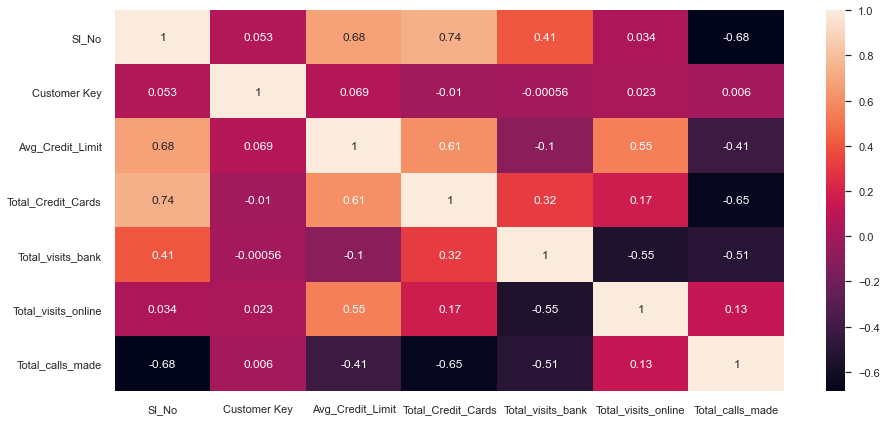

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df_CC.corr(),annot=True)
plt.show()

- Average Credit Limit has high correlation with Total Credit Cards. Clearly, more number of cards will increase the average limit.
- Total visits online also has high correlation with Average Credit Limit and slightly lower correlation with Total Cards. 
- In the same way, if we see the Total visits to Bank, Average Credit Limit has negative correlation.
- One conclusion I see here is, customer who visit online more frequently tend to have more credit limit than bank visitors. Possible that these bank visitors are elderly people with less credit cards.

# Box plots for these interval variables

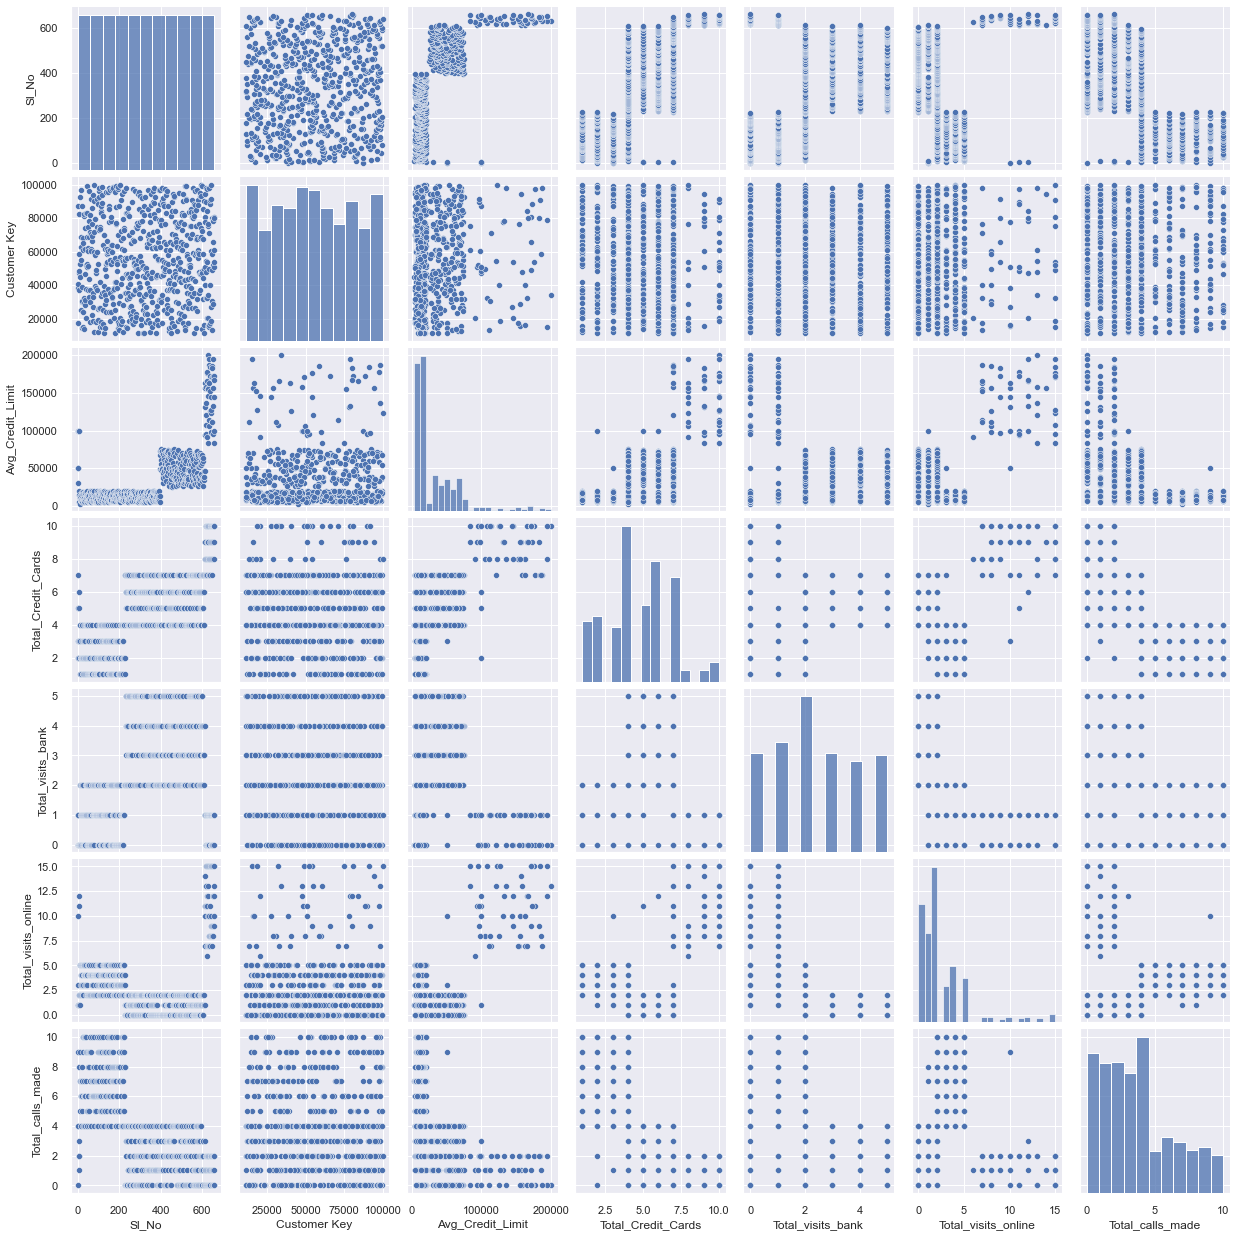

In [22]:
sns.pairplot(data=df_CC)
plt.show()

### Avg_Credit_Limit vs Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

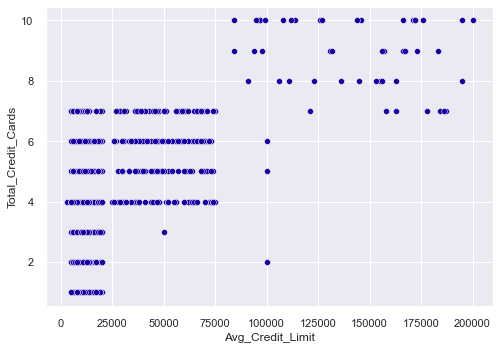

In [26]:
sns.scatterplot(x=df_CC.Avg_Credit_Limit,y=df_CC.Total_Credit_Cards)

- As noted earlier, majority of the customers with high credit limits are the ones with high number of total credit cards. Possibly, as the relationship keeps building with them their credit limits keep increasing.

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_visits_bank'>

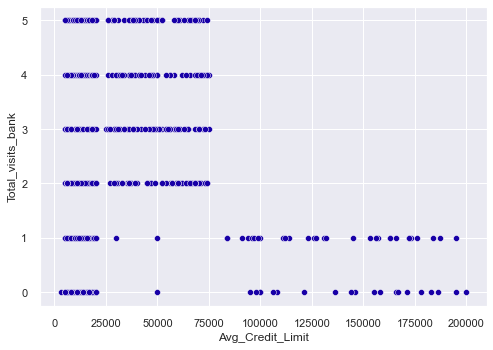

In [27]:
sns.scatterplot(x=df_CC.Avg_Credit_Limit,y=df_CC.Total_visits_bank)

- An interesting observation. All the customers with high credit limits either visited the bank only once or never visited.

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_visits_online'>

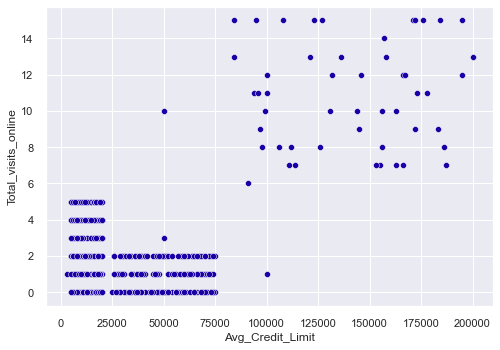

In [28]:
sns.scatterplot(x=df_CC.Avg_Credit_Limit,y=df_CC.Total_visits_online)

- All the customers with high credit limit have visited online multiple times. It looks exactly in correlation with what we saw in the earlier plot.

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

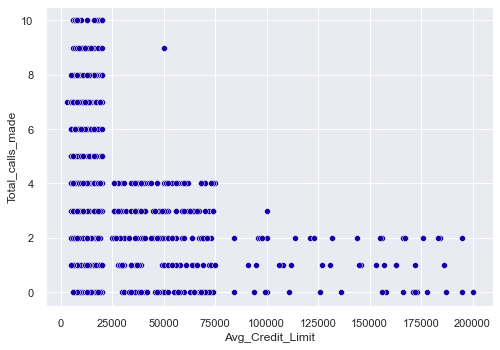

In [29]:
sns.scatterplot(x=df_CC.Avg_Credit_Limit,y=df_CC.Total_calls_made)

- People with high credit limits have called us less than 2 times.

- From the above 3 plots, people with high credit limit visit online often as compared to the bank and make very few calls. They prefer to interact with us online most of the time.

### Total_Credit_Cards vs Total_visits_bank, Total_visits_online, Total_calls_made

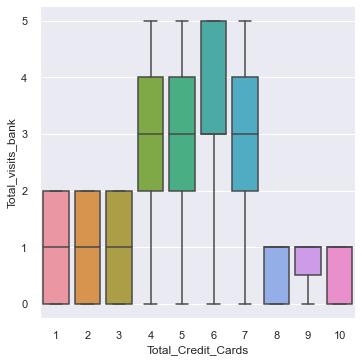

In [32]:
sns.catplot(x="Total_Credit_Cards", y="Total_visits_bank", kind="box", data=df_CC)

- An interesting observation here. People who have 4,5,6,7 credit cards seem to have a lot of visits to the bank. Possibly, these are the customers who are most active about their account or these are the people who doesn't like using online.
- From our earlier deductions these people might be the ones with low credit limits.
- Other customers also do have visits but comparatively very few. 

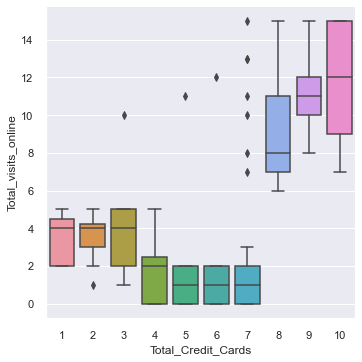

In [33]:
sns.catplot(x="Total_Credit_Cards", y="Total_visits_online", kind="box", data=df_CC)

- This correlates to the observations we made above. Customers with 4,5,6,7 cards have very few online visits. 

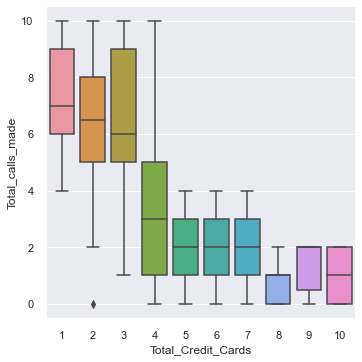

In [34]:
sns.catplot(x="Total_Credit_Cards", y="Total_calls_made", kind="box", data=df_CC)

- The communication pattern of our customers seem very clear with this.
- Customers with <3 credit cards prefer to call
- Customers with 4,5,6,7 cards prefer visiting bank
- Others prefer visiting online.

### Total_visits_bank vs Total_visits_online, Total_calls_made

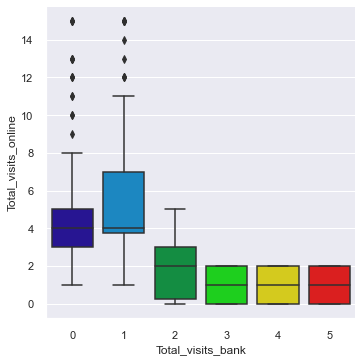

In [35]:
sns.catplot(x="Total_visits_bank", y="Total_visits_online", kind="box", data=df_CC)

- This is self explanatory. Both are inversely related.

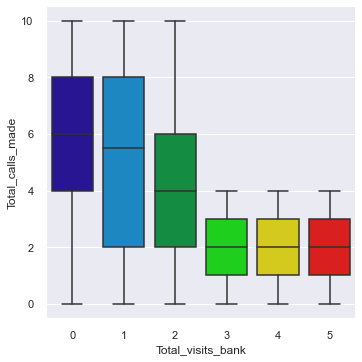

In [36]:
sns.catplot(x="Total_visits_bank", y="Total_calls_made", kind="box", data=df_CC)

- People who visit the banks most make very few calls.

### Total_visits_online vs Total_calls_made

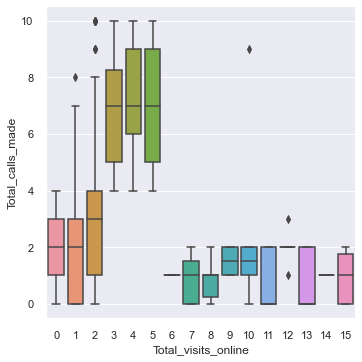

In [37]:
sns.catplot(x="Total_visits_online", y="Total_calls_made", kind="box", data=df_CC)

## Dropping variables which are not necessary

In [38]:
df_CC_new = df_CC.drop(['Sl_No','Customer Key'],axis=1) 

## K-means Clustering

In [39]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df_CC_new[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].copy()
subset_scaled=scaler.fit_transform(subset)

In [40]:
# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9093307084116842
Number of Clusters: 8 	Average Distortion: 0.889281633308646


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

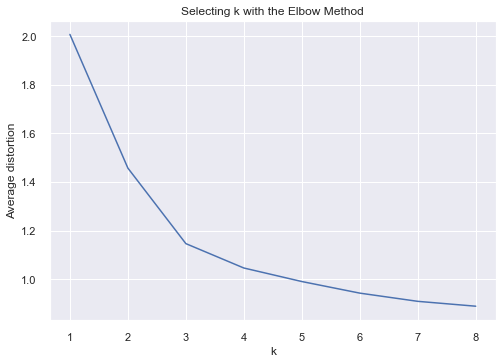

In [41]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- Let's select 3 as the value for k.

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.25545376554456656)
For n_clusters = 7, silhouette score is 0.24790464827085656)
For n_clusters = 8, silhouette score is 0.227266904385329)
For n_clusters = 9, silhouette score is 0.20846718859185442)


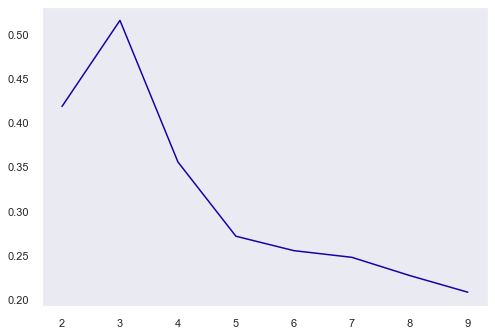

In [42]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

- Silhouette score seems to be high for 3 is high. Let's select 3 as value of k

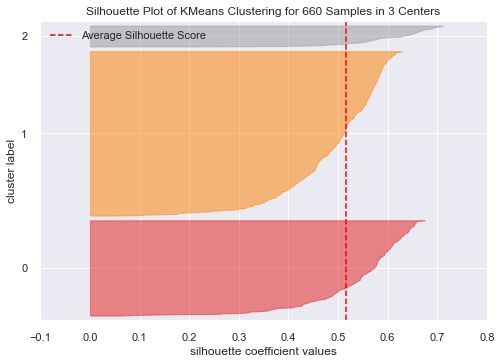

In [43]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [46]:
df_CC_new['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [47]:
cluster_profile = df_CC_new.groupby('K_means_segments').mean()

In [49]:
cluster_profile['count_in_each_segments'] = df_CC_new.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [50]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [54]:
all_col = df_CC_new.select_dtypes(include=np.number).columns.tolist()

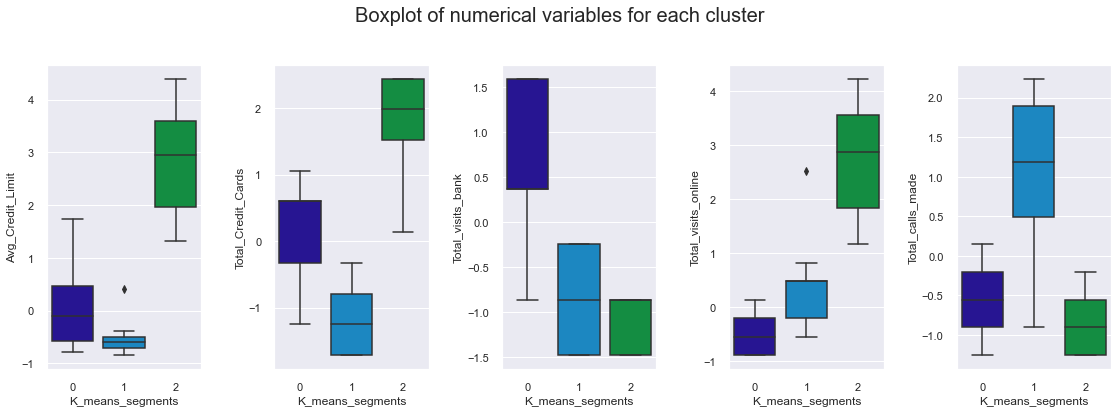

In [55]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

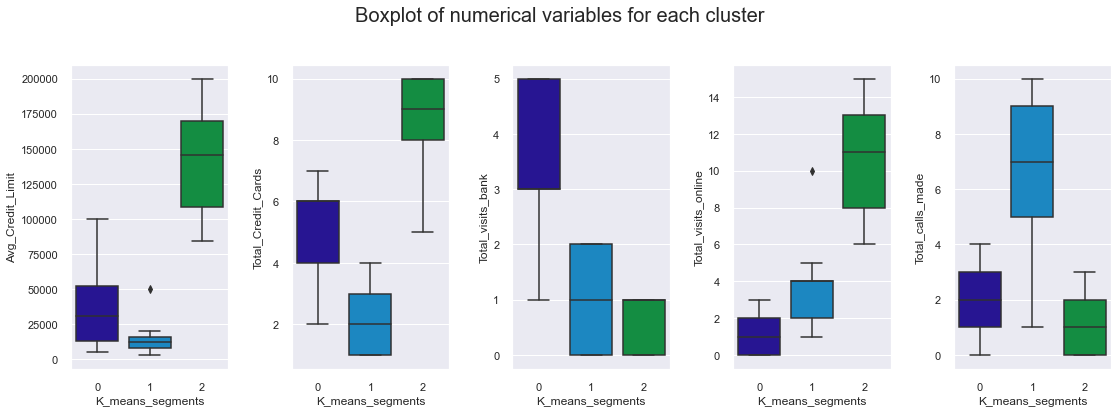

In [56]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_CC_new[all_col[counter]],x=df_CC_new['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains customers with credit limit from 0 to 100,000.
    - It contain customers with average number of total credit cards.
    - This cluster contains customers who visit the bank the most and online the least.
   
- **Cluster 1**:
    - The credit limit for the customers in this cluster is very low, below 25,000.
    - Customers with number of credit cards less than 3.
    - Customers who visit less bank visits and slightly higher online visits.
    - This cluster also contains customers who make the most number of calls.
    
- **Cluster 2**:
    - This cluster contains customers with high credit limits.
    - Also contains customers with highest number of total cards.
    - This cluster contains people who communicate the most with online portal.

## Hierarchical Clustering:

In [60]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df_CC_new[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].copy()
subset_scaled = scaler.fit_transform(subset)   

In [61]:
# Creating a dataframe of the above results
subset_scaled_df = pd.DataFrame(subset_scaled,columns=subset.columns)

In [62]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            



Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.7382354769296767
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.8533474836336782
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.8974159511838106
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.8913624010768603
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.7058064784553606
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.54227912098

In [63]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.8977080867389372, which is obtinaed with euclidean distance metric and average linkage method


### Lets explore 'centroid', 'median','ward' linkage method which requires only Euclidean distance metrics

In [64]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method median is 0.8893799537016724
Cophent correlation for distance metrics euclidean and linkahe method ward is 0.7415156284827493
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
**************************************************************************************************************
Highest cophenet correlation is 0.8977080867389372, which is obtinaed with cityblock distance metric and average linkage method


### Dendogram:

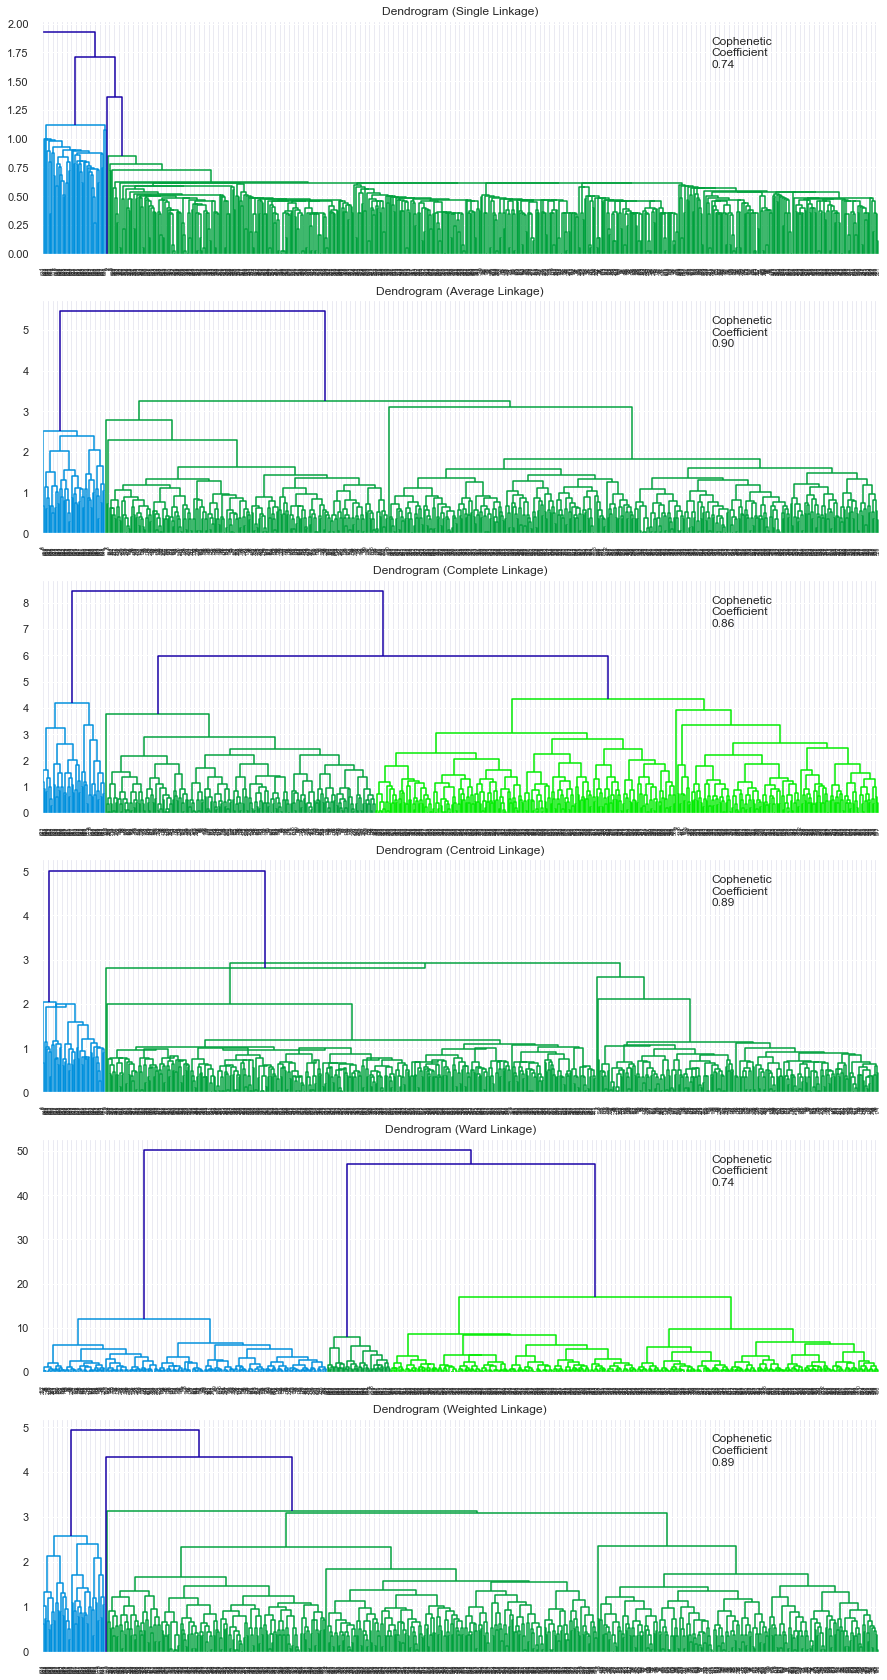

In [65]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

**Observations**
 - Dendrogram with ward linkage method shows distinct and separate cluster

In [66]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,average,0.897708
2,complete,0.859973
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


- Let us see the dndrogram of 'euclidean','cityblock' with 'average', 'weighted' linkage method as they gave high cophenetic correlation value

In [67]:
distance_metrics = [ 'euclidean','cityblock']
linkage_methods = ['average', 'weighted']

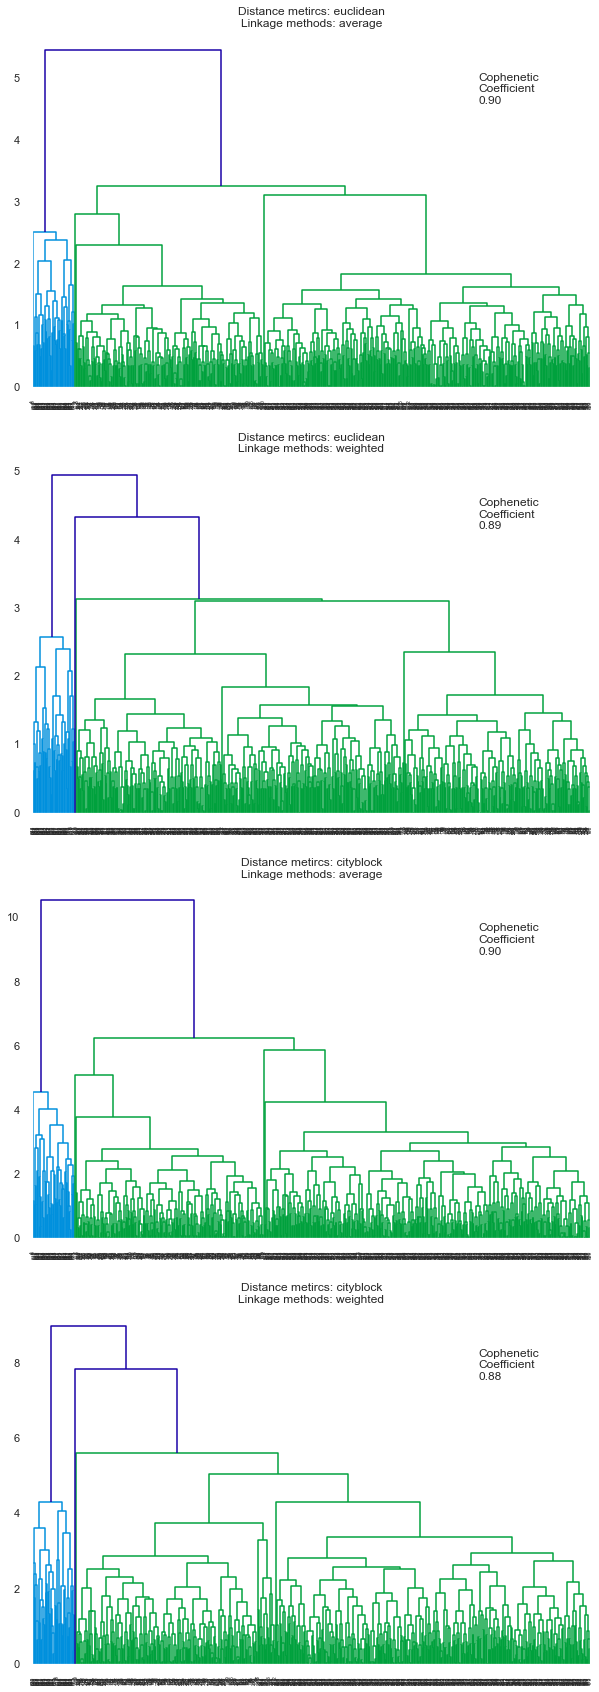

In [68]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

**Observations**
- Out of all the dendrogram we saw, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 3 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

## Let us create 3 clusters


In [70]:
from sklearn.cluster import AgglomerativeClustering 

In [71]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [73]:
df_CC_new['HC_Clusters'] = HCmodel.labels_

In [74]:
cluster_profile = df_CC_new.groupby('HC_Clusters').mean()

In [76]:
cluster_profile['count_in_each_segments'] = df_CC_new.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [77]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,0.000000,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,0.995556,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50


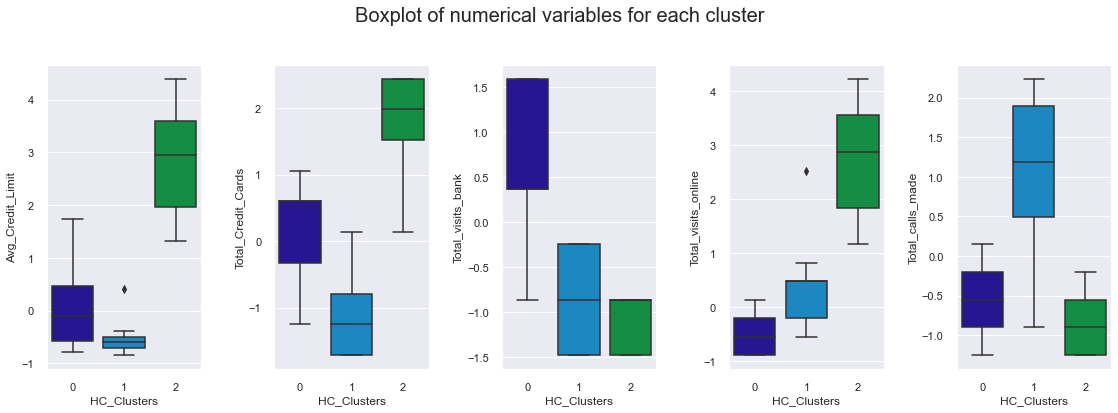

In [78]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

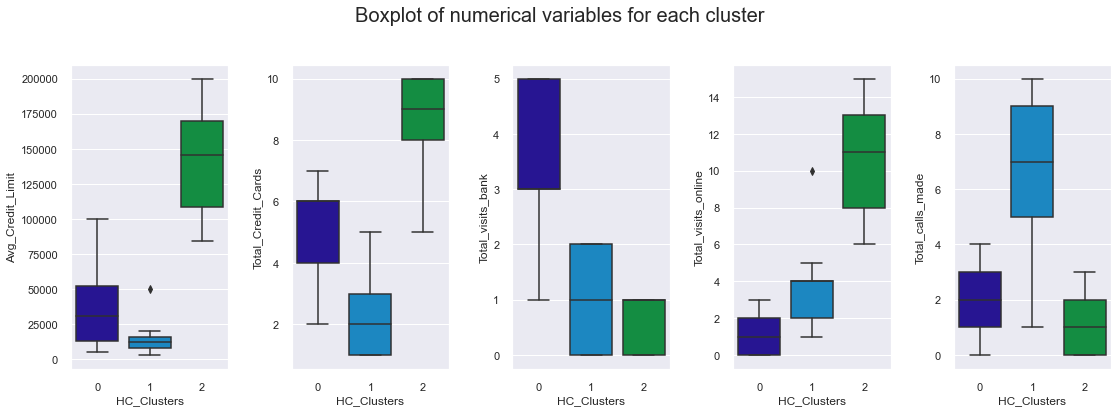

In [80]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_CC_new[all_col[counter]],x=df_CC_new['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains customers with credit limit from 0 to 100,000.
    - It contain customers with average number of total credit cards.
    - This cluster contains customers who visit the bank the most and online the least.
   
- **Cluster 1**:
    - The credit limit for the customers in this cluster is very low, below 25,000.
    - Customers with number of credit cards less than 3.
    - Customers who visit less bank visits and slightly higher online visits.
    - This cluster also contains customers who make the most number of calls.
    
- **Cluster 2**:
    - This cluster contains customers with high credit limits.
    - Also contains customers with highest number of total cards.
    - This cluster contains people who communicate the most with online portal.

### Comparing both the clustering methods:

- While K means ran instantly, hierarchical clustering took about 2 minutes to run.
- We observe that both of these clustering method have produced extremely similar clusters
- This might have happened because the amount of data we have. Bigger the data, better the clustering.
- We have chosen 3 clusters in both these methods.

## Business Recommendations

- The bank can use population in cluster 0 to improve the services they provide at the bank. These are the people with average credit limits, so I am assuming more loyal to us. May be we can look into increasing their credit scores. We also can see if we can convince them to open new credit cards with our bank.

- The cluster 1 population can be used by the bank most effectively. Based on the customer profiles, we do have a lot of opportunity to upsell. They have the least number of cards in our population, so we can market them various offers. Also the credit limits on existing cards is extremely low. That is one key point we can focus on. Coming to the customer service point of view, these guys make a lot of phone calls. We can make sure the agents who recieve the calls are able to promptly respond and resolve their issues.

- The cluster 2 population already have a lot of cards with them with high credit limits. I do not see much oportunity here to upsell. But as they are the high spender population for us, i.e. we get a lot of revenue froom them. So we want to make sure their experience on our website is impeccable. Every service possible should be accessible on the website. 